In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

def cargar_tablas_f1(tablas_a_usar):
    """
    Carga tablas específicas del dataset de F1 directamente en memoria como DataFrames.
    Retorna un diccionario con las tablas.
    """
    dataset = "jtrotman/formula-1-race-data"
    dfs = {}

    for table_name in tablas_a_usar:
        try:
            print(f"📄 Cargando: {table_name}.csv")
            df = kagglehub.load_dataset(
                KaggleDatasetAdapter.PANDAS,
                dataset,
                f"{table_name}.csv"  # ruta relativa dentro del dataset
            )

            # Conversión de fechas
            date_cols = [col for col in df.columns if col.lower() in ["date", "dob"]]
            for col in date_cols:
                df[col] = pd.to_datetime(df[col], errors="coerce")

            # Conversión de tiempos a segundos
            if "time" in df.columns and df["time"].dtype == object:
                df["time_sec"] = df["time"].str.extract(r'(\d+):(\d+\.?\d*)').apply(
                    lambda x: int(x[0])*60 + float(x[1]) if not x.isna().any() else None,
                    axis=1
                )

            # Optimización de tipos numéricos
            for col in df.select_dtypes(include='float'):
                if (df[col] % 1 == 0).all():
                    df[col] = pd.to_numeric(df[col], downcast='integer')

            dfs[table_name] = df
            print(f"✅ {table_name} cargado ({len(df)} filas)")

        except Exception as e:
            print(f"❌ Error en {table_name}: {str(e)}")

    return dfs





c:\Users\ferna\GitHub\machine-learning-notebooks\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

def cargar_tablas_f1(tablas_a_usar):
    """
    Carga tablas específicas del dataset de F1 directamente como variables DataFrame.
    Cada tabla queda disponible como una variable con su mismo nombre.
    """
    dataset = "jtrotman/formula-1-race-data"

    for table_name in tablas_a_usar:
        try:
            print(f"📄 Cargando: {table_name}.csv")
            df = kagglehub.load_dataset(
                KaggleDatasetAdapter.PANDAS,
                dataset,
                f"{table_name}.csv"
            )

            # Conversión de fechas
            date_cols = [col for col in df.columns if col.lower() in ["date", "dob"]]
            for col in date_cols:
                df[col] = pd.to_datetime(df[col], errors="coerce")

            # Conversión de tiempos a segundos
            if "time" in df.columns and df["time"].dtype == object:
                df["time_sec"] = df["time"].str.extract(r'(\d+):(\d+\.?\d*)').apply(
                    lambda x: int(x[0])*60 + float(x[1]) if not x.isna().any() else None,
                    axis=1
                )

            # Optimización de tipos numéricos
            for col in df.select_dtypes(include='float'):
                if (df[col] % 1 == 0).all():
                    df[col] = pd.to_numeric(df[col], downcast='integer')

            # Asignar el DataFrame a una variable con el mismo nombre de la tabla
            globals()[table_name] = df
            print(f"✅ {table_name} cargado ({len(df)} filas)")

        except Exception as e:
            print(f"❌ Error en {table_name}: {str(e)}")



In [3]:
tablas =  ["drivers", "results", "races","constructors","circuits","lap_times", "pit_stops", "status","driver_standings" ]
cargar_tablas_f1(tablas)



📄 Cargando: drivers.csv


C:\Users\ferna\AppData\Local\Temp\ipykernel_7036\1052340872.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


✅ drivers cargado (864 filas)
📄 Cargando: results.csv


C:\Users\ferna\AppData\Local\Temp\ipykernel_7036\1052340872.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


✅ results cargado (27038 filas)
📄 Cargando: races.csv


C:\Users\ferna\AppData\Local\Temp\ipykernel_7036\1052340872.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


✅ races cargado (1149 filas)
📄 Cargando: constructors.csv


C:\Users\ferna\AppData\Local\Temp\ipykernel_7036\1052340872.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


✅ constructors cargado (212 filas)
📄 Cargando: circuits.csv


C:\Users\ferna\AppData\Local\Temp\ipykernel_7036\1052340872.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


✅ circuits cargado (77 filas)
📄 Cargando: lap_times.csv


C:\Users\ferna\AppData\Local\Temp\ipykernel_7036\1052340872.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


✅ lap_times cargado (604522 filas)
📄 Cargando: pit_stops.csv


C:\Users\ferna\AppData\Local\Temp\ipykernel_7036\1052340872.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


✅ pit_stops cargado (11913 filas)
📄 Cargando: status.csv


C:\Users\ferna\AppData\Local\Temp\ipykernel_7036\1052340872.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


✅ status cargado (139 filas)
📄 Cargando: driver_standings.csv


C:\Users\ferna\AppData\Local\Temp\ipykernel_7036\1052340872.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


✅ driver_standings cargado (35151 filas)


In [4]:
# 📌 Paso 3: Función para validar claves y sugerir unión

def validar_relacion(origen, destino, claves_origen, claves_destino, nombre_origen, nombre_destino):
    """
    Valida relación entre dos DataFrames:
    - Comprueba si la clave en destino es PK
    - Verifica si la FK en origen está contenida en destino
    - Sugiere tipo de merge
    """
    print(f"\n📊 VALIDACIÓN DE CLAVES Y SUGERENCIAS DE UNIÓN\n")
    print(f"🔗 Relación: {', '.join(claves_origen)} — {nombre_origen} ➝ {nombre_destino}")

    # 1. ¿Es clave primaria en destino?
    duplicados = destino.duplicated(subset=claves_destino).sum()
    es_pk = duplicados == 0
    print(f"   {'✅' if es_pk else '❌'} Es clave primaria en destino (duplicados: {duplicados})")

    # 2. ¿La FK está cubierta?
    origen_unicos = origen[claves_origen].drop_duplicates()
    destino_unicos = destino[claves_destino].drop_duplicates()

    merge = origen_unicos.merge(
        destino_unicos,
        how="left",
        left_on=claves_origen,
        right_on=claves_destino,
        indicator=True
    )
    faltantes = merge['_merge'].value_counts().get('left_only', 0)
    fk_valida = faltantes == 0
    print(f"   {'✅' if fk_valida else '❌'} Todos los valores existen en destino (FK {'válida' if fk_valida else 'inválida'})")

    # 3. Recomendación
    if fk_valida:
        recomendacion = "left (segura)"
    elif not fk_valida and es_pk:
        recomendacion = "left (con pérdida)"
    else:
        recomendacion = "inner (controlado) o validar más a fondo"
    print(f"   🧩 Recomendación de merge: `{recomendacion}`")


In [5]:
# 📌 Paso 4: Validaciones entre tablas

# Relación results ➝ drivers
validar_relacion(results, drivers, ["driverId"], ["driverId"], "results", "drivers")

# Relación results ➝ races
validar_relacion(results, races, ["raceId"], ["raceId"], "results", "races")

# Relación races ➝ circuits
validar_relacion(races, circuits, ["circuitId"], ["circuitId"], "races", "circuits")

# Relación results ➝ constructors
validar_relacion(results, constructors, ["constructorId"], ["constructorId"], "results", "constructors")

# Relación lap_times ➝ results (por raceId y driverId)
validar_relacion(lap_times, results, ["raceId", "driverId"], ["raceId", "driverId"], "lap_times", "results")

# Relación pit_stops ➝ results (por raceId y driverId)
validar_relacion(pit_stops, results, ["raceId", "driverId"], ["raceId", "driverId"], "pit_stops", "results")

# Relación results ➝ status
validar_relacion(results, status, ["statusId"], ["statusId"], "results", "status")

# Relación driver_standings ➝ results (por raceId y driverId)
validar_relacion(driver_standings, results, ["raceId", "driverId"], ["raceId", "driverId"], "driver_standings", "results")




📊 VALIDACIÓN DE CLAVES Y SUGERENCIAS DE UNIÓN

🔗 Relación: driverId — results ➝ drivers
   ✅ Es clave primaria en destino (duplicados: 0)
   ✅ Todos los valores existen en destino (FK válida)
   🧩 Recomendación de merge: `left (segura)`

📊 VALIDACIÓN DE CLAVES Y SUGERENCIAS DE UNIÓN

🔗 Relación: raceId — results ➝ races
   ✅ Es clave primaria en destino (duplicados: 0)
   ✅ Todos los valores existen en destino (FK válida)
   🧩 Recomendación de merge: `left (segura)`

📊 VALIDACIÓN DE CLAVES Y SUGERENCIAS DE UNIÓN

🔗 Relación: circuitId — races ➝ circuits
   ✅ Es clave primaria en destino (duplicados: 0)
   ✅ Todos los valores existen en destino (FK válida)
   🧩 Recomendación de merge: `left (segura)`

📊 VALIDACIÓN DE CLAVES Y SUGERENCIAS DE UNIÓN

🔗 Relación: constructorId — results ➝ constructors
   ✅ Es clave primaria en destino (duplicados: 0)
   ✅ Todos los valores existen en destino (FK válida)
   🧩 Recomendación de merge: `left (segura)`

📊 VALIDACIÓN DE CLAVES Y SUGERENCIAS DE U

In [6]:
# Paso 1: Copiamos la tabla base de resultados
df_maestro = results.copy()

# Paso 2: Unimos con los datos de pilotos
# Relación: driverId (results) ➝ drivers
df_maestro = df_maestro.merge(
    drivers,
    on='driverId',
    how='left',
    suffixes=('', '_driver')
)

# Paso 3: Unimos con los datos de constructores
# Relación: constructorId (results) ➝ constructors
df_maestro = df_maestro.merge(
    constructors,
    on='constructorId',
    how='left',
    suffixes=('', '_constructor')
)

# Paso 4: Unimos con la tabla de carreras
# Relación: raceId (results) ➝ races
df_maestro = df_maestro.merge(
    races,
    on='raceId',
    how='left',
    suffixes=('', '_race')
)

# Paso 5: Unimos con circuitos usando la clave circuitId incluida en races
# Relación: circuitId (races) ➝ circuits
df_maestro = df_maestro.merge(
    circuits,
    on='circuitId',
    how='left',
    suffixes=('', '_circuit')
)

# Paso 6: Unimos con la tabla de status
# Relación: statusId (results) ➝ status
df_maestro = df_maestro.merge(
    status,
    on='statusId',
    how='left',
    suffixes=('', '_status')
)

# Resultado parcial:
print("✅ Dataset maestro base creado. Dimensiones:", df_maestro.shape)


✅ Dataset maestro base creado. Dimensiones: (27038, 58)


In [7]:
df_maestro


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time_sec_race,circuitRef,name_circuit,location,country,lat,lng,alt,url_circuit,status
0,1,18,1,1,22,1,1,1,1,10.0,...,270.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,270.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,270.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,270.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,270.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27033,27039,1158,839,210,31,17,16,16,16,0.0,...,780.0,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264,http://en.wikipedia.org/wiki/Hungaroring,+1 Lap
27034,27040,1158,852,9,22,20,17,17,17,0.0,...,780.0,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264,http://en.wikipedia.org/wiki/Hungaroring,+1 Lap
27035,27041,1158,861,214,43,14,18,18,18,0.0,...,780.0,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264,http://en.wikipedia.org/wiki/Hungaroring,+1 Lap
27036,27042,1158,842,214,10,16,19,19,19,0.0,...,780.0,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264,http://en.wikipedia.org/wiki/Hungaroring,+1 Lap


In [8]:
# prompt: Objetivo: crear tres columnas en donde la primera columna tengalos nombresde la columna del dataset maestro, la segunda los valores de la primer fila, y la tercerael tipo de dato, la cuartalos valores nulos

# Crear un diccionario para almacenar la información
info_columnas = {}

# Iterar sobre cada columna del DataFrame maestro
for col in df_maestro.columns:
    # Obtener el nombre de la columna
    nombre_columna = col

    # Obtener el valor de la primera fila (manejar DataFrame vacío)
    valor_primera_fila = df_maestro.iloc[0][col] if not df_maestro.empty else None

    # Obtener el tipo de dato
    tipo_dato = df_maestro[col].dtype

    # Contar valores nulos
    valores_nulos = df_maestro[col].isnull().sum()

    # Almacenar la información en el diccionario
    info_columnas[nombre_columna] = {
        'Nombre Columna': nombre_columna,
        'Valor Primera Fila': valor_primera_fila,
        'Tipo de Dato': tipo_dato,
        'Valores Nulos': valores_nulos
    }

# Convertir el diccionario a un DataFrame
df_info_columnas = pd.DataFrame.from_dict(info_columnas, orient='index')

# Mostrar el DataFrame resultante
display(df_info_columnas)

,Nombre Columna,Valor Primera Fila,Tipo de Dato,Valores Nulos
resultId,resultId,1,int64,0
raceId,raceId,18,int64,0
driverId,driverId,1,int64,0
constructorId,constructorId,1,int64,0
number,number,22,object,0
grid,grid,1,int64,0
position,position,1,object,0
positionText,positionText,1,object,0
positionOrder,positionOrder,1,int64,0
points,points,10.0,float64,0


In [9]:
# --- COPIA DE SEGURIDAD ---
df = df_maestro.copy()

# --- ELIMINAR COLUMNAS IRRELEVANTES O REDUNDANTES ---
cols_to_drop = [
    'url', 'url_constructor', 'url_race', 'url_circuit',
    'constructorRef', 'driverRef', 'circuitRef',
    'name', 'name_circuit', 'name_race', 'positionText',
    'number_driver', 'code', 'dob', 'nationality',
    'time_sec', 'time',
    'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
    'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
    'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
    'sprint_date', 'sprint_time'
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# --- CONVERSIÓN Y LIMPIEZA DE VARIABLES RELEVANTES ---
# Convertimos race_time a segundos si tenemos 'milliseconds'
df['milliseconds'] = pd.to_numeric(df['milliseconds'], errors='coerce')
df['race_time_sec'] = df['milliseconds'] / 1000
df.drop(columns=['milliseconds'], inplace=True)

# Convertir fecha a datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Normalizar texto útil
if 'country' in df.columns:
    df['country'] = df['country'].str.strip().replace({
        'UK': 'United Kingdom',
        'USA': 'United States',
        'Korea': 'South Korea'
    })

# Renombrado opcional para mayor claridad
df.rename(columns={
    'date': 'race_date',
    'race_time_sec': 'race_duration_sec'
}, inplace=True)

# Reset de índice por orden
df.reset_index(drop=True, inplace=True)

# --- SALIDA FINAL ---
df_maestro_clean = df


In [10]:
df_maestro_clean

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,...,race_date,time_race,time_sec_race,location,country,lat,lng,alt,status,race_duration_sec
0,1,18,1,1,22,1,1,1,10.0,58,...,2008-03-16,04:30:00,270.0,Melbourne,Australia,-37.8497,144.9680,10,Finished,5690.616
1,2,18,2,2,3,5,2,2,8.0,58,...,2008-03-16,04:30:00,270.0,Melbourne,Australia,-37.8497,144.9680,10,Finished,5696.094
2,3,18,3,3,7,7,3,3,6.0,58,...,2008-03-16,04:30:00,270.0,Melbourne,Australia,-37.8497,144.9680,10,Finished,5698.779
3,4,18,4,4,5,11,4,4,5.0,58,...,2008-03-16,04:30:00,270.0,Melbourne,Australia,-37.8497,144.9680,10,Finished,5707.797
4,5,18,5,1,23,3,5,5,4.0,58,...,2008-03-16,04:30:00,270.0,Melbourne,Australia,-37.8497,144.9680,10,Finished,5708.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27033,27039,1158,839,210,31,17,16,16,0.0,69,...,2025-08-03,13:00:00,780.0,Budapest,Hungary,47.5789,19.2486,264,+1 Lap,5766.489
27034,27040,1158,852,9,22,20,17,17,0.0,69,...,2025-08-03,13:00:00,780.0,Budapest,Hungary,47.5789,19.2486,264,+1 Lap,5768.174
27035,27041,1158,861,214,43,14,18,18,0.0,69,...,2025-08-03,13:00:00,780.0,Budapest,Hungary,47.5789,19.2486,264,+1 Lap,5768.601
27036,27042,1158,842,214,10,16,19,19,0.0,69,...,2025-08-03,13:00:00,780.0,Budapest,Hungary,47.5789,19.2486,264,+1 Lap,5777.575


In [11]:
# prompt: Objetivo: crear tres columnas en donde la primera columna tenga los nombres de la columna del dataset maestro limpio, la segunda los valores de la primer fila, y la tercerael tipo de dato, la cuartalos valores nulos

# Crear un diccionario para almacenar la información
info_columnas_clean = {}

# Iterar sobre cada columna del DataFrame maestro limpio
for col in df_maestro_clean.columns:
    # Obtener el nombre de la columna
    nombre_columna = col

    # Obtener el valor de la primera fila (manejar DataFrame vacío)
    valor_primera_fila = df_maestro_clean.iloc[0][col] if not df_maestro_clean.empty else None

    # Obtener el tipo de dato
    tipo_dato = df_maestro_clean[col].dtype

    # Contar valores nulos
    valores_nulos = df_maestro_clean[col].isnull().sum()

    # Almacenar la información en el diccionario
    info_columnas_clean[nombre_columna] = {
        'Nombre Columna': nombre_columna,
        'Valor Primera Fila': valor_primera_fila,
        'Tipo de Dato': tipo_dato,
        'Valores Nulos': valores_nulos
    }

# Convertir el diccionario a un DataFrame
df_info_columnas_clean = pd.DataFrame.from_dict(info_columnas_clean, orient='index')

# Mostrar el DataFrame resultante
display(df_info_columnas_clean)

,Nombre Columna,Valor Primera Fila,Tipo de Dato,Valores Nulos
resultId,resultId,1,int64,0
raceId,raceId,18,int64,0
driverId,driverId,1,int64,0
constructorId,constructorId,1,int64,0
number,number,22,object,0
grid,grid,1,int64,0
position,position,1,object,0
positionOrder,positionOrder,1,int64,0
points,points,10.0,float64,0
laps,laps,58,int64,0


## DEEP LEARNING (Multiclass Classification con MLP)


## Preparación del entorno y librerías

In [12]:

df = df_maestro_clean.copy()  # Evitamos modificar el original
print("Shape original:", df.shape)


Shape original: (27038, 27)


##  Preprocesamiento para Deep Learning

In [15]:
# 🎯 Objetivo: Predecir 'positionOrder' como clasificación multiclase

# 1. Eliminamos columnas irrelevantes o no numéricas
cols_to_drop = ['resultId', 'number', 'position', 'status', 'forename', 'surname',
                'time_race', 'time_sec_race', 'race_date', 'location', 'country']
df = df_maestro_clean.drop(columns=cols_to_drop)

# 2. Eliminamos filas con valores nulos en columnas críticas
df = df.dropna()

# 3. Codificación categórica con LabelEncoder usando .loc para evitar warning
categorical_cols = ['nationality_constructor']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Variable objetivo
y = df['positionOrder']
X = df.drop(columns=['positionOrder'])

# 5. Escalado de variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Codificación one-hot de la variable objetivo (indexada desde 0)
y_cat = to_categorical(y - 1)

# 7. División entrenamiento / test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

print("✅ Dataset preparado. X_train shape:", X_train.shape)


✅ Dataset preparado. X_train shape: (6338, 15)


## Construcción del Modelo MLP con Keras

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]
num_classes = y_train.shape[1]

model = Sequential([
    Input(shape=(input_dim,)),  # Mejor forma de definir la entrada
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │         1,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,734 (45.84 KB)

 Trainable params: 11,734 (45.84 KB)

 Non-trainable params: 0 (0.00 B)

##  Entrenamiento y evaluación

Epoch 1/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1807 - loss: 2.4860 - val_accuracy: 0.2319 - val_loss: 2.0217
Epoch 2/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2842 - loss: 1.9462 - val_accuracy: 0.3683 - val_loss: 1.6957
Epoch 3/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3568 - loss: 1.7077 - val_accuracy: 0.4621 - val_loss: 1.5083
Epoch 4/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4085 - loss: 1.5548 - val_accuracy: 0.5071 - val_loss: 1.3922
Epoch 5/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4483 - loss: 1.4532 - val_accuracy: 0.5678 - val_loss: 1.2987
Epoch 6/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4751 - loss: 1.3857 - val_accuracy: 0.5844 - val_loss: 1.2333
Epoch 7/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5071 - loss: 1.3259 - val_accuracy: 0.6159 - val_loss: 1.1808
Epoch 8/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5112 - loss: 1.2929 - val_accuracy: 0.

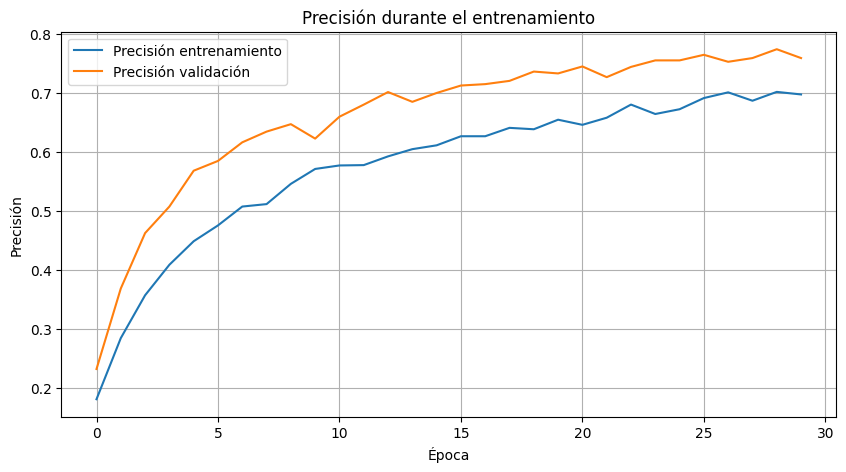

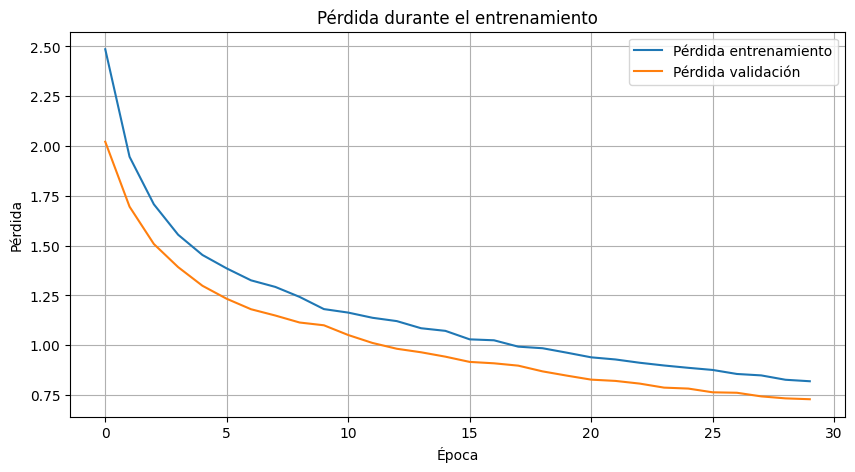

In [17]:
import matplotlib.pyplot as plt

# -------------------------
# BLOQUE DE ENTRENAMIENTO Y EVALUACIÓN DEL MODELO MLP
# -------------------------

# Parámetros de entrenamiento
EPOCHS = 30
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
RANDOM_STATE = 42

# Entrenamiento del modelo
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1
)

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Evaluación en conjunto de test - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# -------------------------
# VISUALIZACIÓN DE MÉTRICAS
# -------------------------

# Precisión durante entrenamiento y validación
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Pérdida durante entrenamiento y validación
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
##  Entrenamiento y evaluación